# Problem 2 PageRank and Eigenvectors

In [3]:
import numpy as np
import matplotlib.pyplot as plt


## Problem 2.1 Representing undirected graphs by matrices

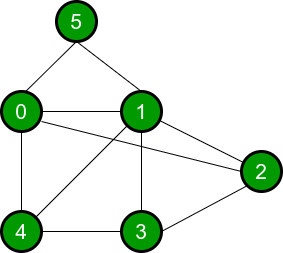

In [ ]:
# Please construct the unnormalized  matrix based on the figure above
##################Your codes start here####################
G = np.array ([[0, 1, 1, 0, 1, 1],
              [1, 0, 1, 1, 1, 1],
              [1, 1, 0, 1, 0, 0],
              [0, 1, 1, 0, 1, 0],
              [1, 1, 0, 1, 0, 0],
              [1, 1, 0, 0, 0, 0]])
############################################################
print("Matrix generated based on the network above is")
print(G)

In [5]:
# Please finish the normalization function here
def normalize_graph(G):
  ########################Your codes start here#################
  col_sum = G.sum(axis=0)
  col_sum[col_sum == 0] = 1
  G_N = G / col_sum
  ##############################################################
  return G_N

In [6]:
G_N = normalize_graph(G)
print("The matrix after normalization is:")
print(G_N)

The matrix after normalization is:
[[0.         0.2        0.33333333 0.         0.33333333 0.5       ]
 [0.25       0.         0.33333333 0.33333333 0.33333333 0.5       ]
 [0.25       0.2        0.         0.33333333 0.         0.        ]
 [0.         0.2        0.33333333 0.         0.33333333 0.        ]
 [0.25       0.2        0.         0.33333333 0.         0.        ]
 [0.25       0.2        0.         0.         0.         0.        ]]


## Problem 2.2 Finding the importance vector

### Please use the matrix G_N from Problem 2.1

In [9]:
# implement algorithm 1 here:
def find_importance_vector(G_N):
  ####################Your codes start here ##########################
  i = 1000
  tol = 1e-6
  n = G_N.shape[0]
  v = np.ones(n) / n
  vold = v.copy()

  j = 0
  while j < i:
    v = np.dot(G_N, vold)
    v /= np.sum(v)

    if np.linalg.norm(vold - v) / np.linalg.norm(vold) <= tol:
      break

    vold = v.copy()
    j += 1

  ##################################################################
  return v

In [8]:
v = find_importance_vector(G_N)  # v is the resulting vector from the loop.
print("The important vector found is:\{}".format(v))

The important vector found is:\[0.2000001  0.25000004 0.14999992 0.15000006 0.14999992 0.09999995]


In [10]:
# v should be close to
# [0.2 ,0.25, 0.15, 0.15, 0.15, 0.1 ]^⊺ (Updated here)
# there could exist some small difference between your result and this vector

# Here you need to check the relative difference
# between v you generated and v_hat
v_hat = np.array(
    [[0.2 ,0.25, 0.15, 0.15, 0.15, 0.1 ]] #Updated here
    ).T
print("Given v_hat is \n{}".format(v_hat))
####################Your codes start here ##########################
relative_dist = np.linalg.norm(v - v_hat) / np.linalg.norm(v_hat)


##################################################################
print("The relative dist between v and v_hat is {}".format(relative_dist))

Given v_hat is 
[[0.2 ]
 [0.25]
 [0.15]
 [0.15]
 [0.15]
 [0.1 ]]
The relative dist between v and v_hat is 0.9428094508783148


## 2.3 PageRank vector

In [ ]:
# A new unnormalized matrix G is given:
np.random.seed(2033)
G_half = np.random.randint(0,2,(100, 100))
G = (G_half+G_half.T)
G = (np.sign(G))
G = G.astype(np.float32)
for i in range(100):
  G[i, i] = 0.
print(np.linalg.norm(G-G.T))
print(G)

In [11]:
# Step (a)
# Compute the normalized matrix G_N based on G in Porblem 2.3: 100-by-100 matrix
#######################Your codes start here ##########################
G_N = normalize_graph(G)
#########################################################################

In [13]:
# Step (b)
# Use the built-in function np.linalg.eig to find the eigenvector corresponding
# to the eigenvalue = 1
#######################Your codes start here ##########################
w, V = np.linalg.eig(G_N)
i = np.argmax(np.abs(w))
eigen_vector = V[:, i]
#########################################################################
print("Eigenvector found (while eigenvalue = 1) is: ")
print(eigen_vector)

Eigenvector found (while eigenvalue = 1) is: 
[0.47140452 0.58925565 0.35355339 0.35355339 0.35355339 0.23570226]


In [14]:
# Step (c)
# Fix the eigenvector correponding to the eigenvalue = 1 from V
# according to the code hints in 2.3 (c) on Page 5 of pdf file
#######################Your codes start here ##########################
v_abs = np.abs(v)
v_PageRank = v_abs / np.sum(v_abs)
#########################################################################
print("Page Rank Vector is:")
print(v_PageRank)

Page Rank Vector is:
[0.2000001  0.25000004 0.14999992 0.15000006 0.14999992 0.09999995]


In [15]:
# Use your find_importance_vector() to generate imp_vec
# check relative distance between imp_vec and v_PageRank
# should be close to 0 (non-negative values less than 1e-5 are acceptable)
#######################Your codes start here ##########################
imp_vec = find_importance_vector(v_PageRank)
relative_dist = np.linalg.norm(imp_vec - v_PageRank) / np.linalg.norm(v_PageRank)
#########################################################################
print("Relative Dist between imp_vec and v_PageRank is {}".format(relative_dist))
print("importance vector is \n{}".format(imp_vec))

Relative Dist between imp_vec and v_PageRank is 1.8790612311832724e-16
importance vector is 
[0.2000001  0.25000004 0.14999992 0.15000006 0.14999992 0.09999995]


In [16]:
# Find the indices of the 5 most important webpages from v_PageRank
# i.e., find the largest 5 elements from v_PageRank
#######################Your codes start here ##########################
ind_top_5 = np.argsort(v_PageRank)[::-1][:5]
#########################################################################
print("Top 5 indices are: ")
print(ind_top_5)

Top 5 indices are: 
[1 0 3 4 2]
